Building an Image Classifier using CNN

#Setup

In [12]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# path on laptop
#path = r"C:\Users\Strix\.cache\kagglehub\datasets\andrewmvd\medical-mnist\versions\1"

# path on desktop
path = r"C:\Users\seaba\.cache\kagglehub\datasets\andrewmvd\medical-mnist\versions\1"

# path = kagglehub.dataset_download("andrewmvd/medical-mnist")

print(path)





C:\Users\seaba\.cache\kagglehub\datasets\andrewmvd\medical-mnist\versions\1


# Load a dataset

In [13]:
datagen = ImageDataGenerator(rescale = 1.0/255, validation_split=0.2)

In [14]:
train_generator = datagen.flow_from_directory(
    path,
    target_size = (28,28),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = "sparse",
    subset = "training"
)

validation_generator = datagen.flow_from_directory(
    path,
    target_size = (28,28),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = "sparse",
    subset = "validation"
)

#X_train, y_train = train_generator.next()
#X_valid, y_valid = validation_generator.next()

Found 47164 images belonging to 6 classes.
Found 11790 images belonging to 6 classes.


In [15]:
history = cnn.fit(
    train_generator,
    epochs = 5,
    validation_data = validation_generator
)

NameError: name 'cnn' is not defined

# Build a neural network model

In [5]:
cnn = tf.keras.models.Sequential() #initializing the CNN
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[28, 28, 1])) #Convolution 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
cnn.add(tf.keras.layers.Flatten()) #Flaterning
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

c:\Users\Strix\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

#compiling the model:


In [7]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# training neural network model:


In [8]:
history = cnn.fit(X_train, y_train, batch_size = 100, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 97s 170ms/step - accuracy: 0.6565 - loss: 1.5508 - val_accuracy: 0.8760 - val_loss: 0.3454
Epoch 2/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 92s 166ms/step - accuracy: 0.8814 - loss: 0.3260 - val_accuracy: 0.8874 - val_loss: 0.3066
Epoch 3/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 91s 165ms/step - accuracy: 0.9023 - loss: 0.2642 - val_accuracy: 0.8932 - val_loss: 0.2883
Epoch 4/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 92s 168ms/step - accuracy: 0.9102 - loss: 0.2438 - val_accuracy: 0.9044 - val_loss: 0.2665
Epoch 5/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 94s 171ms/step - accuracy: 0.9186 - loss: 0.2191 - val_accuracy: 0.9068 - val_loss: 0.2537


#Evaluation



In [9]:
score = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9003 - loss: 0.2813


In [10]:
print('Total loss on Testing Set:', score[0])

Total loss on Testing Set: 0.27252766489982605


In [11]:
print('Accuracy of Testing Set:', score[1])

Accuracy of Testing Set: 0.9035999774932861


#Predicting the first three images from the test set


1.   print the predicted results of the first three images from the test set
2.   print the real label of the first three images from the test set



In [12]:
X_new = X_test[:3]
y_proba = cnn.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.01, 0.  , 0.98, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [13]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(cnn.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([9, 2, 1], dtype=int64)

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [16]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

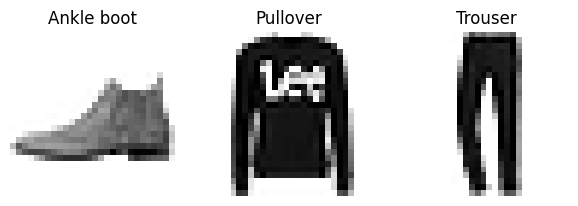

In [17]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()